In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Data Analysis

In [2]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
gender_submission=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
train_data.head()
train_data.value_counts("Cabin"),train_data.value_counts("Ticket")


(Cabin
 C23 C25 C27    4
 G6             4
 B96 B98        4
 F2             3
 C22 C26        3
               ..
 C101           1
 B94            1
 B86            1
 B82 B84        1
 T              1
 Length: 147, dtype: int64,
 Ticket
 1601        7
 CA. 2343    7
 347082      7
 CA 2144     6
 347088      6
            ..
 345572      1
 345364      1
 343276      1
 343275      1
 347464      1
 Length: 681, dtype: int64)

array([[<AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Age'>,
        <AxesSubplot:xlabel='Parch', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare',

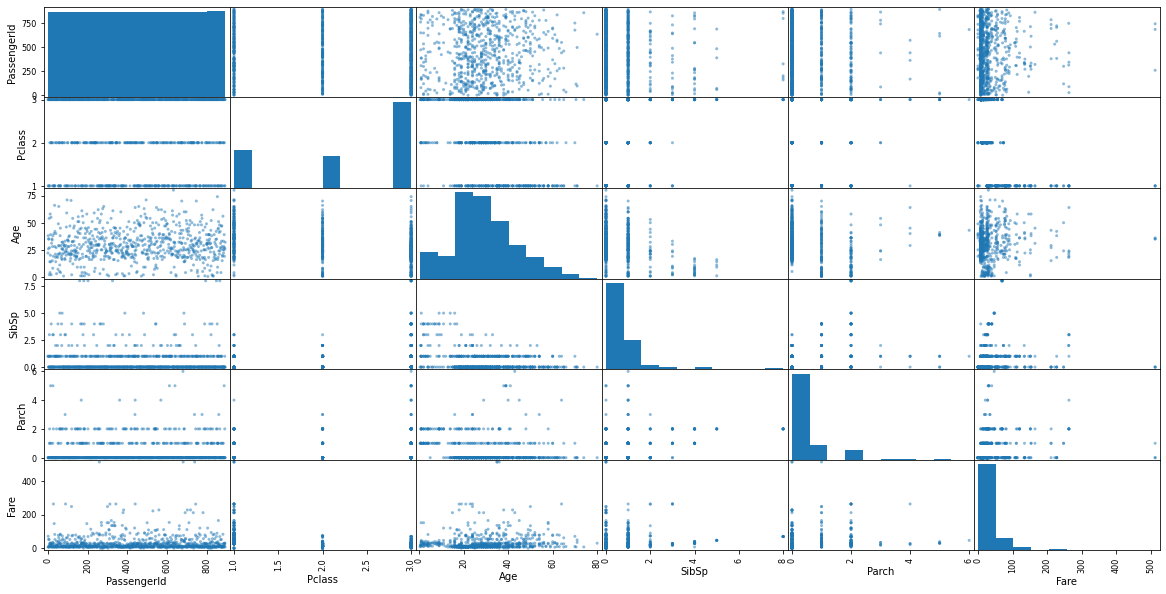

In [4]:
from pandas.plotting import scatter_matrix

atributes_num=(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
scatter_matrix(train_data[atributes_num], figsize=(20,10))

In [5]:
train_data.shape,train_data.isna().sum()

((891, 12),
 PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64)

In [6]:
train_data=train_data.drop(["Cabin"],axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [7]:
from sklearn.model_selection import StratifiedKFold

str_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)


for train_index, test_index in str_kf.split(train_data, train_data['Survived']):
  
    cv_train, cv_test = train_data.iloc[train_index], train_data.iloc[test_index]
cv_train.shape,cv_test.shape

((594, 11), (297, 11))

In [8]:
train_data=cv_train.drop(["Survived","Name","Ticket"],axis=1)
test_data=cv_test.drop(["Survived","Name","Ticket"],axis=1)
train_labels=cv_train.Survived
test_labels=cv_test.Survived
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 1 to 889
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  594 non-null    int64  
 1   Pclass       594 non-null    int64  
 2   Sex          594 non-null    object 
 3   Age          482 non-null    float64
 4   SibSp        594 non-null    int64  
 5   Parch        594 non-null    int64  
 6   Fare         594 non-null    float64
 7   Embarked     593 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 41.8+ KB


In [9]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pipeline_num=Pipeline([("imputer", SimpleImputer(strategy="median")),
                       ("scaler", StandardScaler())])
pipeline_cat=Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                        ("encoder", OneHotEncoder())])

In [10]:
from sklearn.compose import ColumnTransformer

pipeline=ColumnTransformer([("num", pipeline_num,atributes_num),
                           ("cat", pipeline_cat,["Sex"])])
train_data_prepared=pipeline.fit_transform(train_data)
test_data_prepared=pipeline.transform(test_data)

# Finding the best model

DecisionTreeClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=42)
classifier.fit(train_data_prepared,train_labels)


DecisionTreeClassifier(random_state=42)

In [12]:
from sklearn.metrics import confusion_matrix, f1_score

test_data_prepared=pipeline.transform(test_data)
predicts_test=classifier.predict(test_data_prepared)
print(confusion_matrix(test_labels,predicts_test))
print(f1_score(test_labels,predicts_test))

[[139  44]
 [ 30  84]]
0.6942148760330578


RandomForestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier=RandomForestClassifier()
params={'max_features':[0.2,0.4],
        'min_samples_leaf': [4,6,8], 'min_samples_split':[4,6,8]}
model=GridSearchCV(classifier,param_grid=params,cv=5)
model.fit(train_data_prepared,train_labels)
predicts_test_rfc=model.predict(test_data_prepared)
print(confusion_matrix(test_labels,predicts_test_rfc))
print(f1_score(test_labels,predicts_test_rfc))


[[160  23]
 [ 25  89]]
0.7876106194690264


In [14]:
model.best_params_


{'max_features': 0.4, 'min_samples_leaf': 4, 'min_samples_split': 4}

In [15]:
test=pd.read_csv("/kaggle/input/titanic/test.csv")
test_prepared_submission=pipeline.transform(test)
predictions_model=model.predict(test_prepared_submission)
passegender_id=test.PassengerId
data={"PassengerId": passegender_id, "Survived":predictions_model}
submission_model=pd.DataFrame(data)
submission_model.to_csv("gender_submission_model_final_2.csv", index=False)